<a href="https://colab.research.google.com/github/ApurbaKumarNath/dsa/blob/main/Data%20Structures/8_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## From Codebasics

In [ ]:
class Graph:
  def __init__(self, edges):
    self.edges = edges
    self.graph_dict = {}

    for src, dest in edges: # src = source, dest = destination
      if src in self.graph_dict:
        self.graph_dict[src].append(dest)
      else:
        self.graph_dict[src] = [dest]

  def get_paths(self, src, dest, path = []):
    path = path + [src]

    if src == dest:
      return path

    if src not in self.graph_dict:
      return []

    paths = []
    for node in self.graph_dict[src]:
      if node not in path:
        new_paths = self.get_paths(node, dest, path)
        for p in new_paths:
          paths.append(p)

    return paths

  def get_shortest_path(self, src, dest, path = []):
    path = path + [src]

    if src == dest:
      return path

    if src not in self.graph_dict:
      return None

    shortest_path = None
    for node in self.graph_dict[src]:
      if node not in path:
        sp = self.get_shortest_path(node, dest, path)
        if sp:
          if shortest_path is None or len(sp) < len(shortest_path):
            shortest_path = sp

    return shortest_path

routes = [
    ('Mumbai', 'Paris'),
    ('Mumbai', 'Dubai'),
    ('Paris', 'Dubai'),
    ('Paris', 'New York'),
    ('Dubai', 'New York'),
    ('New York', 'Toronto')
]

route_graph = Graph(routes)

start = 'Mumbai'
end = 'New York'
print(route_graph.graph_dict)
print(f"Paths between {start} and {end}: ", route_graph.get_paths(start, end))
print(f"Shortest path between {start} and {end}: ", route_graph.get_shortest_path(start, end))

{'Mumbai': ['Paris', 'Dubai'], 'Paris': ['Dubai', 'New York'], 'Dubai': ['New York'], 'New York': ['Toronto']}
Paths between Mumbai and New York:  ['Mumbai', 'Paris', 'Dubai', 'New York', 'Mumbai', 'Paris', 'New York', 'Mumbai', 'Dubai', 'New York']
Shortest path between Mumbai and New York:  ['Mumbai', 'Paris', 'New York']


## Learned in Class

In [ ]:
#dynamic way of creating the adjacency matrix
import numpy as np
def undirected_adjacency_matrix():
  n=int(input("Size of matrix: "))
  matrix=np.zeros((n,n), dtype=int)
  lst=[]
  print("Input the vertices: ")
  for i in range(n):
    user=input("Vertex: ")
    lst+=[user]
  for i in range(n):
    for j in range(n):
      if matrix[i][j]==0:
        user=input(f"Connction of vertex {lst[i]} with vertex {lst[j]} : ")
        matrix[i][j]=int(user)
        matrix[j][i]=int(user)
  return (matrix,lst)

## Lab 8

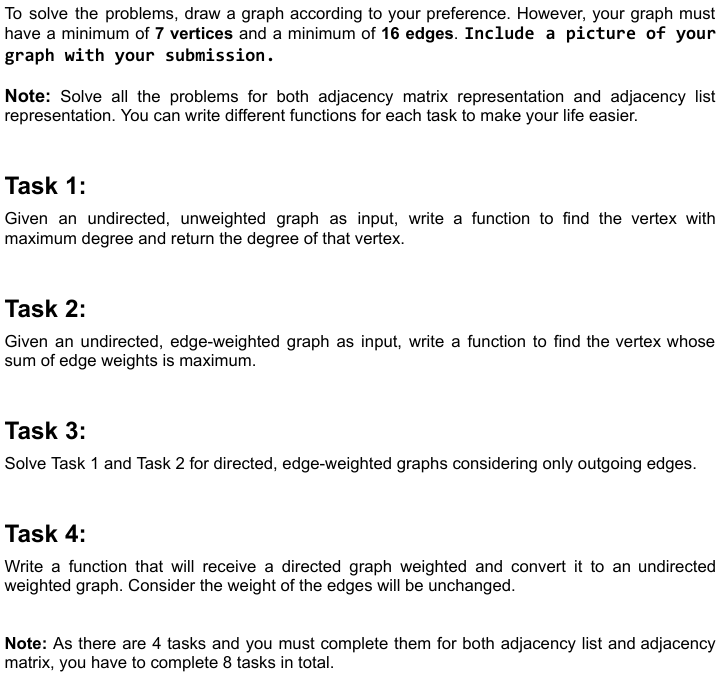

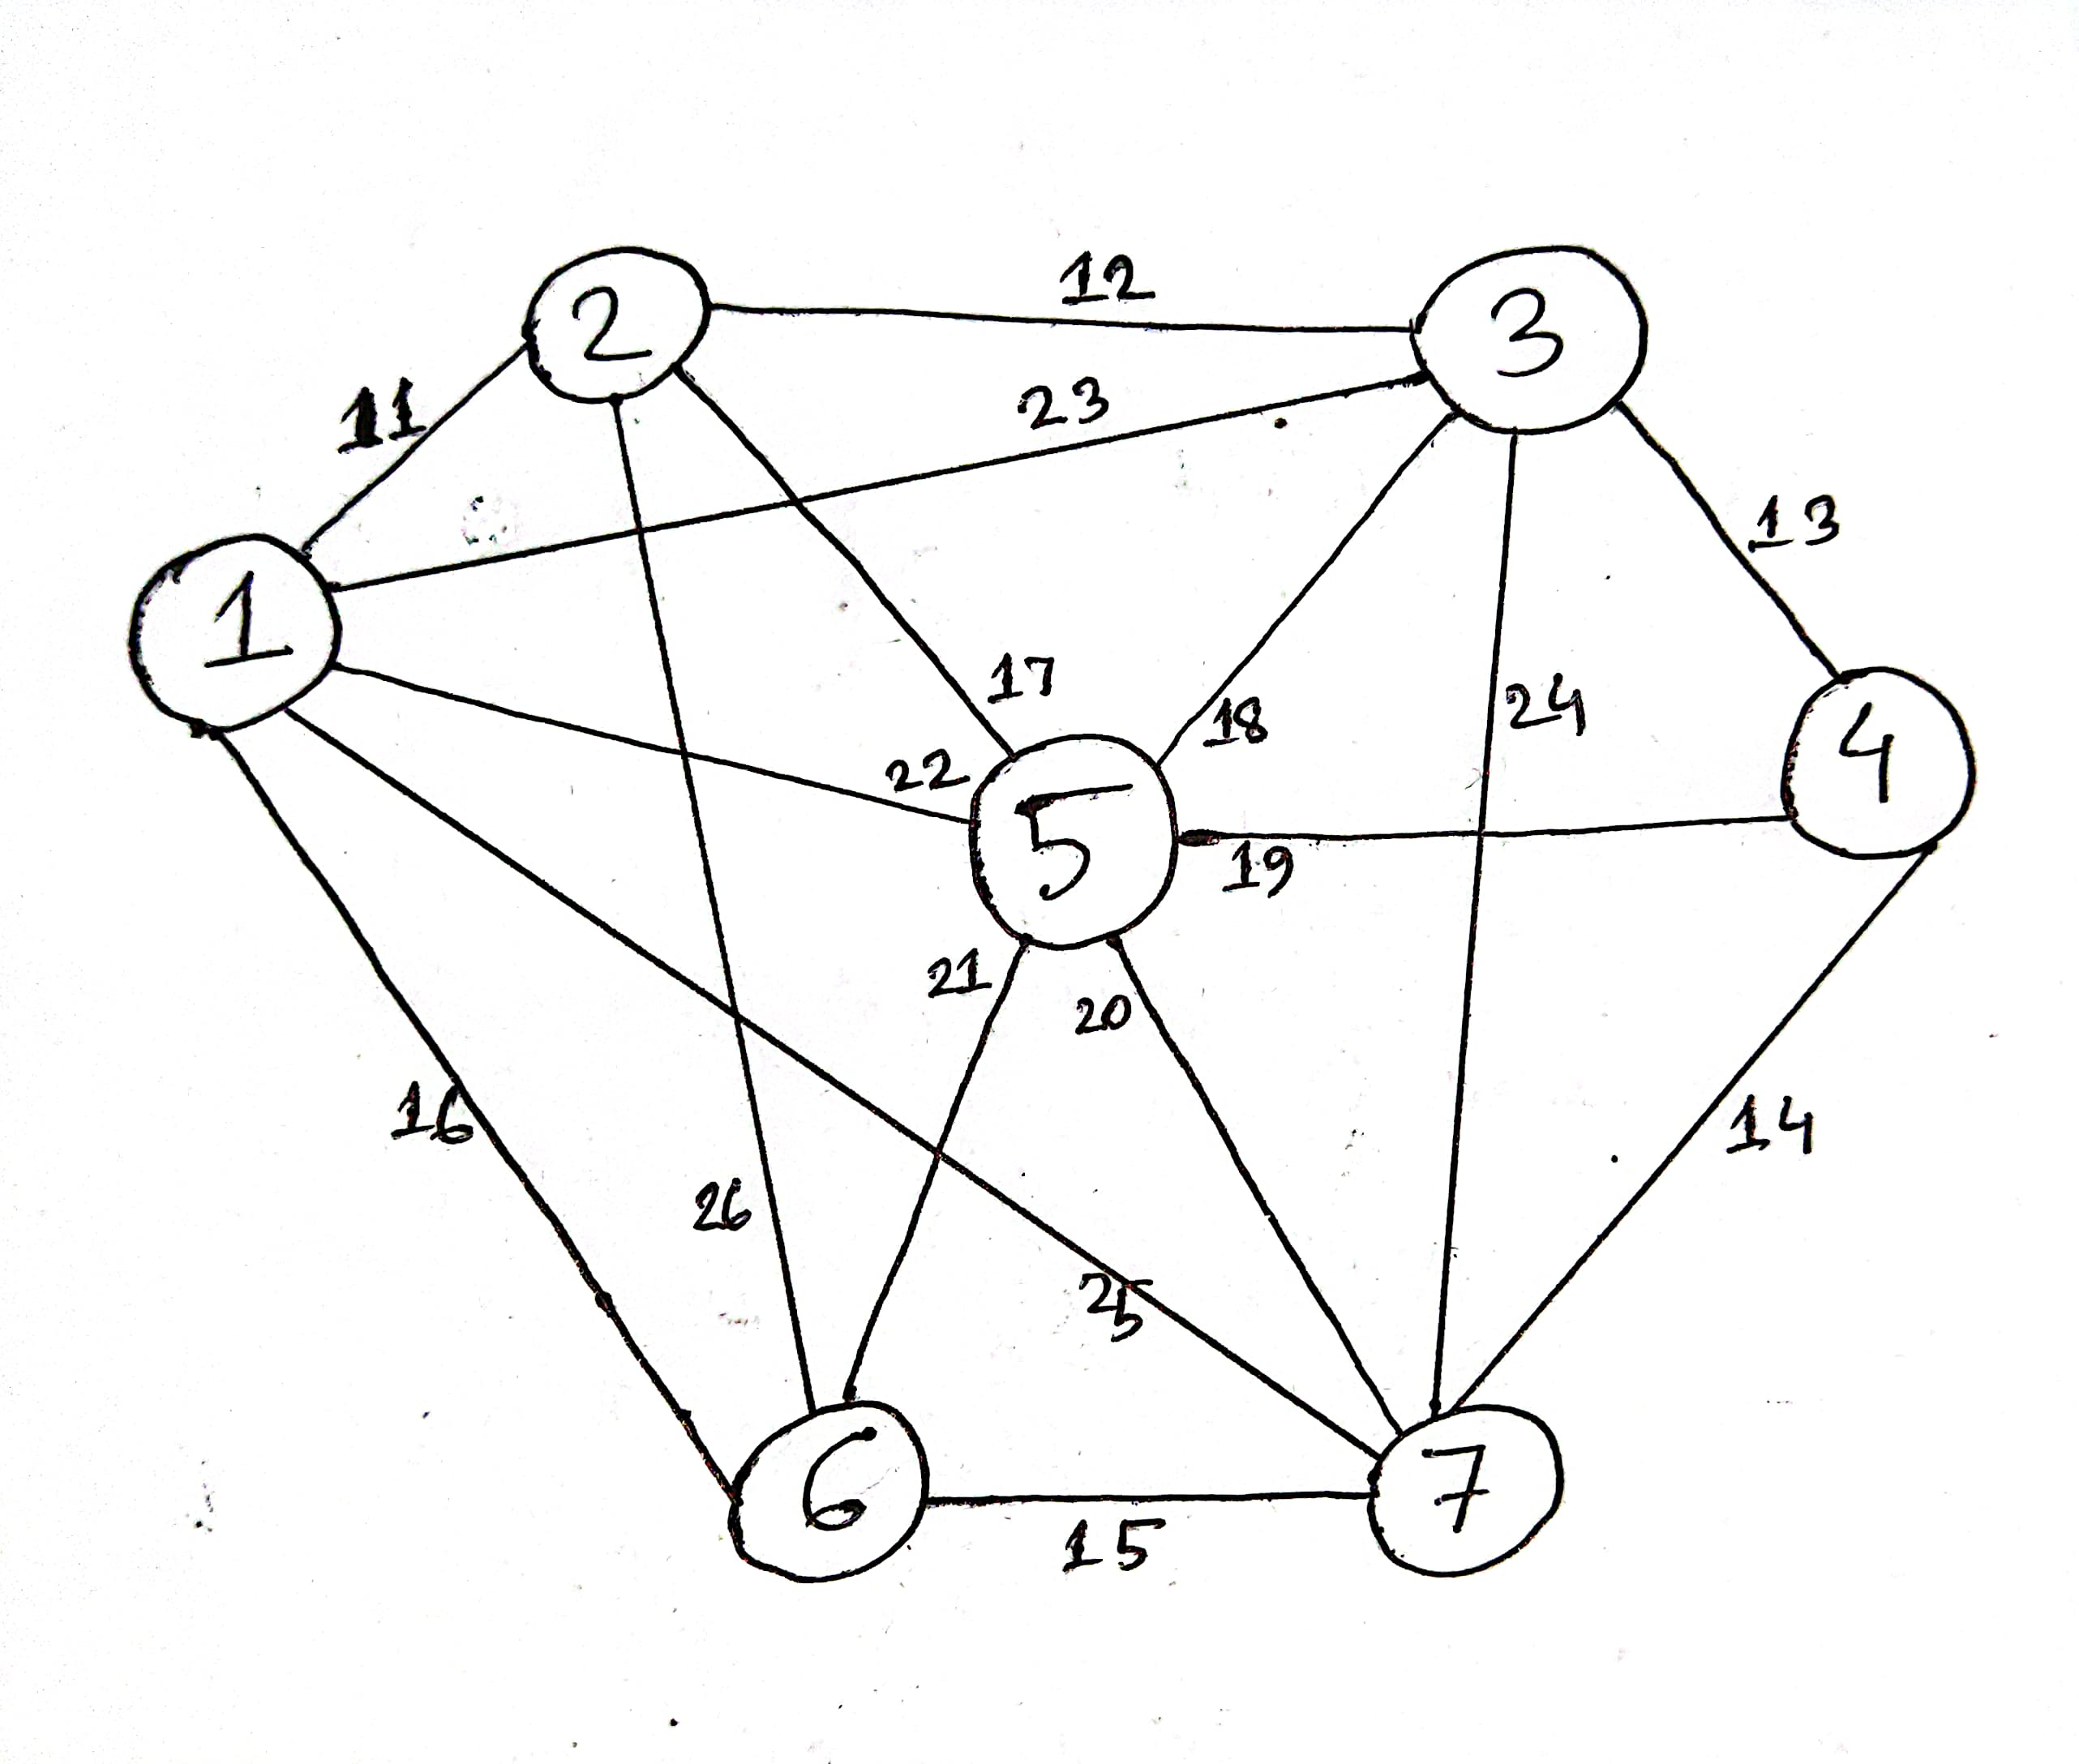

In [ ]:
import numpy as np

class Vertex:
  def __init__(self, data):
    self.data = data
    self.next = None

Task 1

In [ ]:
# using adjacency list:

class Graph:
  def __init__(self, vertex_list, size):
    self.vertex_list = vertex_list
    self.size = size
    self.adj_list = np.array([None] * size)

  def add_Edge(self, source, dest): # dest = destination
    new_node = Vertex(dest)
    new_node.next = self.adj_list[source]
    self.adj_list[source] = new_node

    new_node = Vertex(source)
    new_node.next = self.adj_list[dest]
    self.adj_list[dest] = new_node

  def get_Vertex_With_Max_Degree(self):
    max_degree = -1  # Initialize with a value smaller than any possible degree
    max_degree_vertex = -1

    for vertex in range(self.size):
      degree = 0
      current = self.adj_list[vertex]
      while current:
        degree += 1
        current = current.next

      if degree > max_degree:
        max_degree = degree
        max_degree_vertex = self.vertex_list[vertex] # vertex that is containing max degree

    return f"vertex: {max_degree_vertex}, degree: {max_degree}"


In [ ]:
# Driver code
graph = Graph(['A', 'B', 'C', 'D', 'E', 'F', 'G'], 7)
graph.add_Edge(0,1)
graph.add_Edge(0,2)
graph.add_Edge(0,3)
graph.add_Edge(0,4)
graph.add_Edge(1,2)
graph.add_Edge(1,3)
graph.add_Edge(1,5)
graph.add_Edge(2,3)
graph.add_Edge(2,5)
graph.add_Edge(2,6)
graph.add_Edge(3,4)
graph.add_Edge(3,5)
graph.add_Edge(4,5)
graph.add_Edge(5,6)

print(graph.get_Vertex_With_Max_Degree())

vertex: C, degree: 5


In [ ]:
# using adjacency matrix:
class Graph:
  def __init__(self, vertex_list, size):
    self.vertex_list = vertex_list
    self.size = size
    self.adj_matrix = np.zeros((size, size), dtype = int)

  def add_Edge(self, source, dest):
    self.adj_matrix[source][dest] = 1
    self.adj_matrix[dest][source] = 1

  def get_Vertex_With_Max_Degree(self):
    max_degree = -1
    max_degree_vertex = -1
    for i in range(self.size):
      degree = 0

      for j in range(self.size):
        if self.adj_matrix[i][j] == 1:
          degree += 1

      if degree > max_degree:
        max_degree = degree
        max_degree_vertex = self.vertex_list[i] # vertex that is containing max degree
    return f"vertex: {max_degree_vertex}, degree: {max_degree}"

In [ ]:
# Driver code:
graph = Graph(['A', 'B', 'C', 'D', 'E', 'F', 'G'], 7)
graph.add_Edge(0,1)
graph.add_Edge(0,2)
graph.add_Edge(0,3)
graph.add_Edge(0,4)
graph.add_Edge(1,2)
graph.add_Edge(1,3)
graph.add_Edge(1,5)
graph.add_Edge(2,3)
graph.add_Edge(2,5)
graph.add_Edge(2,6)
graph.add_Edge(3,4)
graph.add_Edge(3,5)
graph.add_Edge(4,5)
graph.add_Edge(5,6)

print(graph.get_Vertex_With_Max_Degree())

vertex: C, degree: 5


Task 2

In [ ]:
# using adjacency list:
class Graph:
  def __init__(self, vertex_list, size):
    self.vertex_list = vertex_list
    self.adj_list = np.array([None] * size)
    self.size = size

  def add_Edge(self, source, dest, weight):
    node = Vertex((dest, weight)) # vertex's self.data = (dest, weight)
    node.next = self.adj_list[source]
    self.adj_list[source] = node

    node = Vertex((source, weight))
    node.next = self.adj_list[dest]
    self.adj_list[dest] = node

  def get_Vertex_With_Max_Weight_Sum(self):
    vertex = -1
    max_weight = -1
    for i in range(self.size):
      weight_sum = 0
      current = self.adj_list[i]

      while current:
          weight_sum += current.data[1]
          current = current.next

      if max_weight < weight_sum:
          max_weight = weight_sum
          vertex = self.vertex_list[i]

    return f"vertex: {vertex}, weight: {max_weight}"

In [ ]:
# Driver code:
graph = Graph(['A', 'B', 'C', 'D', 'E', 'F', 'G'], 7)
graph.add_Edge(0,1, 11)
graph.add_Edge(0,2, 12)
graph.add_Edge(0,3, 13)
graph.add_Edge(0,4, 14)
graph.add_Edge(1,2, 15)
graph.add_Edge(1,3, 16)
graph.add_Edge(1,5, 17)
graph.add_Edge(2,3, 18)
graph.add_Edge(2,5, 19)
graph.add_Edge(2,6, 20)
graph.add_Edge(3,4, 21)
graph.add_Edge(3,5, 22)
graph.add_Edge(4,5, 23)
graph.add_Edge(5,6, 24)

print(graph.get_Vertex_With_Max_Weight_Sum())

vertex: F, weight: 105


In [ ]:
# using adjacency matrix:
class Graph:
  def __init__(self, vertex_list, size):
    self.vertex_list = vertex_list
    self.adj_matrix =np.zeros((size,size),dtype = int)
    self.size = size

  def add_Edge(self, source, dest, weight):
    self.adj_matrix[source][dest] = weight
    self.adj_matrix[dest][source] = weight

  def get_Vertex_With_Max_Weight_Sum(self):
    vertex = -1
    max_weight = -1
    for i in range(self.size):
      weight_sum = 0

      for j in range(self.size):
        if self.adj_matrix[i][j] != 0:
          weight_sum += self.adj_matrix[i][j]

      if weight_sum > max_weight:
        max_weight = weight_sum
        vertex = self.vertex_list[i]

    return f"vertex: {vertex}, weight: {max_weight}"

In [ ]:
# Driver code:
graph = Graph(['A', 'B', 'C', 'D', 'E', 'F', 'G'], 7)
graph.add_Edge(0,1, 11)
graph.add_Edge(0,2, 12)
graph.add_Edge(0,3, 13)
graph.add_Edge(0,4, 14)
graph.add_Edge(1,2, 15)
graph.add_Edge(1,3, 16)
graph.add_Edge(1,5, 17)
graph.add_Edge(2,3, 18)
graph.add_Edge(2,5, 19)
graph.add_Edge(2,6, 20)
graph.add_Edge(3,4, 21)
graph.add_Edge(3,5, 22)
graph.add_Edge(4,5, 23)
graph.add_Edge(5,6, 24)

print(graph.get_Vertex_With_Max_Weight_Sum())

vertex: F, weight: 105


Task 3

In [ ]:
# task1 (using adjacency list)

class Graph:
  def __init__(self, vertex_list, size):
    self.vertex_list = vertex_list
    self.adj_list = np.array([None] * size)
    self.size = size

  def add_Edge(self, source, dest, weight):
    node = Vertex((dest, weight))
    node.next = self.adj_list[source]
    self.adj_list[source] = node

  def get_Vertex_With_Max_Degree(self):
    vertex = -1
    max_degree = -1
    for i in range(self.size):
      degree = 0
      current = self.adj_list[i]

      while current:
        degree+=1
        current = current.next

      if max_degree < degree:
        max_degree = degree
        vertex = self.vertex_list[i]

    return f"vertex: {vertex}, degree: {max_degree}"


In [ ]:
# Driver Code
graph = Graph(['A', 'B', 'C', 'D', 'E', 'F', 'G'], 7)
graph.add_Edge(0,1, 11)
graph.add_Edge(0,2, 12)
graph.add_Edge(0,3, 13)
graph.add_Edge(0,4, 14)
graph.add_Edge(1,2, 15)
graph.add_Edge(1,3, 16)
graph.add_Edge(1,5, 17)
graph.add_Edge(2,3, 18)
graph.add_Edge(2,5, 19)
graph.add_Edge(2,6, 20)
graph.add_Edge(3,4, 21)
graph.add_Edge(3,5, 22)
graph.add_Edge(4,5, 23)
graph.add_Edge(5,6, 24)

print(graph.get_Vertex_With_Max_Degree())

vertex: A, degree: 4


In [ ]:
# task 1 (using adjacency matrix)

class Graph:
  def __init__(self, vertex_list, size):
    self.vertex_list = vertex_list
    self.adj_matrix =np.zeros((size, size), dtype = int)
    self.size = size

  def add_Edge(self, source, dest, weight):
    self.adj_matrix[source][dest] = weight

  def get_Vertex_With_Max_Degree(self):
    vertex = -1
    max_degree = -1
    for i in range(self.size):
      degree = 0

      for j in range(self.size):
        if self.adj_matrix[i][j] != 0:
          degree += 1

      if degree > max_degree:
          max_degree = degree
          vertex = self.vertex_list[i]
    return f"vertex: {vertex}, degree: {max_degree}"

In [ ]:
# Driver Code
graph = Graph(['A', 'B', 'C', 'D', 'E', 'F', 'G'], 7)
graph.add_Edge(0,1, 11)
graph.add_Edge(0,2, 12)
graph.add_Edge(0,3, 13)
graph.add_Edge(0,4, 14)
graph.add_Edge(1,2, 15)
graph.add_Edge(1,3, 16)
graph.add_Edge(1,5, 17)
graph.add_Edge(2,3, 18)
graph.add_Edge(2,5, 19)
graph.add_Edge(2,6, 20)
graph.add_Edge(3,4, 21)
graph.add_Edge(3,5, 22)
graph.add_Edge(4,5, 23)
graph.add_Edge(5,6, 24)

print(graph.get_Vertex_With_Max_Degree())

vertex: A, degree: 4


In [ ]:
# task 2 (using adjacency list)

class Graph:
  def __init__(self, vertex_list, size):
    self.vertex_list = vertex_list
    self.adj_list = np.array([None] * size)
    self.size = size

  def add_Edge(self, source, dest, weight):
    node = Vertex((dest,weight))
    node.next = self.adj_list[source]
    self.adj_list[source] = node

  def get_Vertex_With_Max_Weight_Sum(self):
    vertex = -1
    max_weight = -1

    for i in range(self.size):
      weight = 0
      current = self.adj_list[i]

      while current:
        weight += current.data[1]
        current = current.next

      if max_weight < weight:
        max_weight = weight
        vertex = self.vertex_list[i]

    return f"vertex: {vertex}, weight: {max_weight}"


In [ ]:
# Driver Code
graph = Graph(['A', 'B', 'C', 'D', 'E', 'F', 'G'], 7)
graph.add_Edge(0,1, 11)
graph.add_Edge(0,2, 12)
graph.add_Edge(0,3, 13)
graph.add_Edge(0,4, 14)
graph.add_Edge(1,2, 15)
graph.add_Edge(1,3, 16)
graph.add_Edge(1,5, 17)
graph.add_Edge(2,3, 18)
graph.add_Edge(2,5, 19)
graph.add_Edge(2,6, 20)
graph.add_Edge(3,4, 21)
graph.add_Edge(3,5, 22)
graph.add_Edge(4,5, 23)
graph.add_Edge(5,6, 24)
print(graph.get_Vertex_With_Max_Weight_Sum())

vertex: C, weight: 57


In [ ]:
# task 2 (using adjacency matrix)

class Graph:
  def __init__(self, vertex_list, size):
    self.vertex_list = vertex_list
    self.adj_matrix =np.zeros((size, size), dtype = int)
    self.size = size

  def add_Edge(self, source, dest, weight):
    self.adj_matrix[source][dest] = weight

  def get_Vertex_With_Max_Weight_Sum(self):
    vertex = -1
    max_weight = -1

    for i in range(self.size):
      weight_sum = 0

      for j in range(self.size):
        if self.adj_matrix[i][j] != 0:
          weight_sum += self.adj_matrix[i][j]

      if weight_sum > max_weight:
        max_weight = weight_sum
        vertex = self.vertex_list[i]

    return f"vertex: {vertex}, weight: {max_weight}"

In [ ]:
# Driver Code
graph = Graph(['A', 'B', 'C', 'D', 'E', 'F', 'G'], 7)
graph.add_Edge(0,1, 11)
graph.add_Edge(0,2, 12)
graph.add_Edge(0,3, 13)
graph.add_Edge(0,4, 14)
graph.add_Edge(1,2, 15)
graph.add_Edge(1,3, 16)
graph.add_Edge(1,5, 17)
graph.add_Edge(2,3, 18)
graph.add_Edge(2,5, 19)
graph.add_Edge(2,6, 20)
graph.add_Edge(3,4, 21)
graph.add_Edge(3,5, 22)
graph.add_Edge(4,5, 23)
graph.add_Edge(5,6, 24)
print(graph.get_Vertex_With_Max_Weight_Sum())

vertex: C, weight: 57


Task 4

In [ ]:
class Graph:
  def __init__(self, vertex_list, size):
    self.vertex_list = vertex_list
    self.adj_list = np.array([None] * size)
    self.size = size

  def add_Edge(self, source, dest, weight):
    node = Vertex((dest, weight))
    node.next = self.adj_list[source]
    self.adj_list[source] = node

  def not_undirected(self, src, dest, weight):
    current = self.adj_list[src]

    while current:
      if current.data[0] == dest and current.data[1] == weight:
        return False # Already undirected, no need to add_Edge
      current = current.next
    return True

  def convert_To_Undirected(self):
    for src in range(self.size):
      current = self.adj_list[src] # current.data[0] = dest, current.data[1] = weight

      while current:
        dest = current.data[0]; weight = current.data[1]
        if self.not_undirected(dest, src, weight):
          self.add_Edge(dest, src, weight)
        current = current.next

  def print_Adj_List(self):
    for src in range(self.size):
      print(f"vertex {self.vertex_list[src]}: ", end = '')
      current = self.adj_list[src]

      while current:
          print(f"({self.vertex_list[current.data[0]]}, {current.data[1]})", end=" -> ") # self.data[0] = dest, self.data[1] = weight
          current = current.next
      print("None")

In [ ]:
# Driver Code
graph = Graph(['A', 'B', 'C', 'D', 'E', 'F', 'G'], 7)
graph.add_Edge(0,1, 11)
graph.add_Edge(0,2, 12)
graph.add_Edge(0,3, 13)
graph.add_Edge(0,4, 14)
graph.add_Edge(1,2, 15)
graph.add_Edge(1,3, 16)
graph.add_Edge(1,5, 17)
graph.add_Edge(2,3, 18)
graph.add_Edge(2,5, 19)
graph.add_Edge(2,6, 20)
graph.add_Edge(3,4, 21)
graph.add_Edge(3,5, 22)
graph.add_Edge(4,5, 23)
graph.add_Edge(5,6, 24)


graph.print_Adj_List()
graph.convert_To_Undirected()
print()
graph.print_Adj_List()

vertex A: (E, 14) -> (D, 13) -> (C, 12) -> (B, 11) -> None
vertex B: (F, 17) -> (D, 16) -> (C, 15) -> None
vertex C: (G, 20) -> (F, 19) -> (D, 18) -> None
vertex D: (F, 22) -> (E, 21) -> None
vertex E: (F, 23) -> None
vertex F: (G, 24) -> None
vertex G: None

vertex A: (E, 14) -> (D, 13) -> (C, 12) -> (B, 11) -> None
vertex B: (A, 11) -> (F, 17) -> (D, 16) -> (C, 15) -> None
vertex C: (B, 15) -> (A, 12) -> (G, 20) -> (F, 19) -> (D, 18) -> None
vertex D: (C, 18) -> (B, 16) -> (A, 13) -> (F, 22) -> (E, 21) -> None
vertex E: (D, 21) -> (A, 14) -> (F, 23) -> None
vertex F: (E, 23) -> (D, 22) -> (C, 19) -> (B, 17) -> (G, 24) -> None
vertex G: (F, 24) -> (C, 20) -> None


In [ ]:
class Graph:
  def __init__(self, vertex_list, size):
    self.vertex_list = vertex_list
    self.adj_matrix = np.zeros((size, size), dtype = int)
    self.size = size

  def add_Edge(self,source, dest, weight):
    self.adj_matrix[source][dest] = weight

  def convert_To_Undirected(self):
    for i in range(self.size):
      for j in range(self.size):
        if self.adj_matrix[i][j] != 0:
          self.adj_matrix[j][i] = self.adj_matrix[i][j]

  def print_Matrix(self):
    max_digit = 0
    for a in range(self.size):
      for b in range(self.size):
        if max_digit < len(str(self.adj_matrix[a][b])):
          max_digit = len(str(self.adj_matrix[a][b]))

    max_len = 0
    for vertex in self.vertex_list:
      if max_len < len(vertex):
        max_len = len(vertex)

    if max_len > max_digit:
      max_space = max_len
    else:
      max_space = max_digit

    print(max_space*' ', end = ' ')
    for vertex in self.vertex_list:
      print((max_space - len(vertex))*' ', vertex, end = ' ')
    print()

    for i in range(self.size):
      length = len(self.vertex_list[i])
      print(self.vertex_list[i], end = (max_space-length)*' ')

      for j in range(self.size):
        digit = len(str(self.adj_matrix[i][j]))
        print((max_space - digit + 1)*' ', self.adj_matrix[i][j], end = '')
      print()


In [ ]:
# Driver Code
graph = Graph(['A', 'B', 'C', 'D', 'E', 'F', 'G'], 7)
graph.add_Edge(0,1, 11)
graph.add_Edge(0,2, 12)
graph.add_Edge(0,3, 13)
graph.add_Edge(0,4, 14)
graph.add_Edge(1,2, 15)
graph.add_Edge(1,3, 17)
graph.add_Edge(1,5, 17)
graph.add_Edge(2,3, 18)
graph.add_Edge(2,5, 19)
graph.add_Edge(2,6, 20)
graph.add_Edge(3,4, 21)
graph.add_Edge(3,5, 22)
graph.add_Edge(4,5, 23)
graph.add_Edge(5,6, 24)


print('Before converting to an undirected graph:\n')
graph.print_Matrix()
graph.convert_To_Undirected()
print('\nAfter converting to an undirected graph:\n')
graph.print_Matrix()

Before converting to an undirected graph:

     A   B   C   D   E   F   G 
A    0  11  12  13  14   0   0
B    0   0  15  17   0  17   0
C    0   0   0  18   0  19  20
D    0   0   0   0  21  22   0
E    0   0   0   0   0  23   0
F    0   0   0   0   0   0  24
G    0   0   0   0   0   0   0

After converting to an undirected graph:

     A   B   C   D   E   F   G 
A    0  11  12  13  14   0   0
B   11   0  15  17   0  17   0
C   12  15   0  18   0  19  20
D   13  17  18   0  21  22   0
E   14   0   0  21   0  23   0
F    0  17  19  22  23   0  24
G    0   0  20   0   0  24   0
